# Stock market prediction



Our team:
- Babics Bence
- Osváth Barnabás
- Tamás Ferenc

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Data Provider
- Our data provider will be alpha vantage (https://www.alphavantage.co/) who sends share prices every minute
- They have a Python library to make our job easier
- They are able to send data every minute while the stock market is open

We are working on Google Cloud but results of our exploratory study can be found in this notebook

In [0]:
# Data was downloaded from AlphaVenture api

google = pd.read_csv('https://raw.githubusercontent.com/bmedl/platform/master/deep_learning_data/amd_data_1004_1014.csv')
apple =  pd.read_csv('https://raw.githubusercontent.com/bmedl/platform/master/deep_learning_data/apple_data_1004_1014.csv')
tesla = pd.read_csv('https://raw.githubusercontent.com/bmedl/platform/master/deep_learning_data/tesla_data_1004_1014.csv')
amd =  pd.read_csv('https://raw.githubusercontent.com/bmedl/platform/master/deep_learning_data/amd_data_1004_1014.csv')
intel =  pd.read_csv('https://raw.githubusercontent.com/bmedl/platform/master/deep_learning_data/intel_data_1004_1014.csv')

In [0]:
google['date'] = pd.to_datetime(google['date'])
apple['date'] = pd.to_datetime(apple['date'])
tesla['date'] = pd.to_datetime(tesla['date'])
amd['date'] = pd.to_datetime(amd['date'])
intel['date'] = pd.to_datetime(intel['date'])

In [0]:
google["sym"] = "Google"
apple["sym"] = "Apple"
intel["sym"] = "Intel"
amd["sym"] = "AMD"
tesla["sym"] = "Tesla"

splitting full date into 2 parts: date and time

In [0]:
google["OnlyDate"] = pd.to_datetime(google['date']).dt.date
google["OnlyTime"] = pd.to_datetime(google['date']).dt.time

apple["OnlyDate"] = pd.to_datetime(apple['date']).dt.date
apple["OnlyTime"] = pd.to_datetime(apple['date']).dt.time

tesla["OnlyDate"] = pd.to_datetime(tesla['date']).dt.date
tesla["OnlyTime"] = pd.to_datetime(tesla['date']).dt.time

amd["OnlyDate"] = pd.to_datetime(amd['date']).dt.date
amd["OnlyTime"] = pd.to_datetime(amd['date']).dt.time

intel["OnlyDate"] = pd.to_datetime(intel['date']).dt.date
intel["OnlyTime"] = pd.to_datetime(intel['date']).dt.time

In [0]:
AllData = google.append(apple).append(intel).append(amd).append(tesla)

The inputs of the planned neural network are the given number (time_steps) of previous datapoints. The output is the closing price of the next datapoint. These two functions construct the arrays of inputs and outputs.

In [0]:
def get_timeseries(df, time_steps):
  dim_0 = df.shape[0] - time_steps
  dim_1 = df.shape[1]
  x = np.zeros((dim_0, time_steps, dim_1))
  y = np.zeros((dim_0,))

  for i in range(dim_0):
    x[i] = df[i:time_steps+i]
    y[i] = df[time_steps+i, 3]
  return x, y

#this function makes sure that the length of the input array will be divisible with the chosen batch size
def trim_dataset(df, batch_size):
    no_of_rows_drop = df.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return df[:-no_of_rows_drop]
    else:
        return df      

## Exploratory study

Dataset of Google stock prices, from 2019.10.04 9:31 (EDT) to 2019.10.09. 16:00 (five days of open market). It contains minutely data of opening, closing, highest, lowest price and the volume of the stocks.

We check what the format of the data is like

In [14]:
google.head(3)

date  1. open  2. high  ...     sym    OnlyDate  OnlyTime
0 2019-10-04 09:31:00    28.83    29.03  ...  Google  2019-10-04  09:31:00
1 2019-10-04 09:32:00    28.93    29.05  ...  Google  2019-10-04  09:32:00
2 2019-10-04 09:33:00    29.02    29.03  ...  Google  2019-10-04  09:33:00

[3 rows x 9 columns]

Different days were plotted in order to investigate how the stock prices moved from time to time while stock exchange was open.

### Google prices

OnlyDate
2019-10-04    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-07    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-08    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-09    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-10    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-11    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-14    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

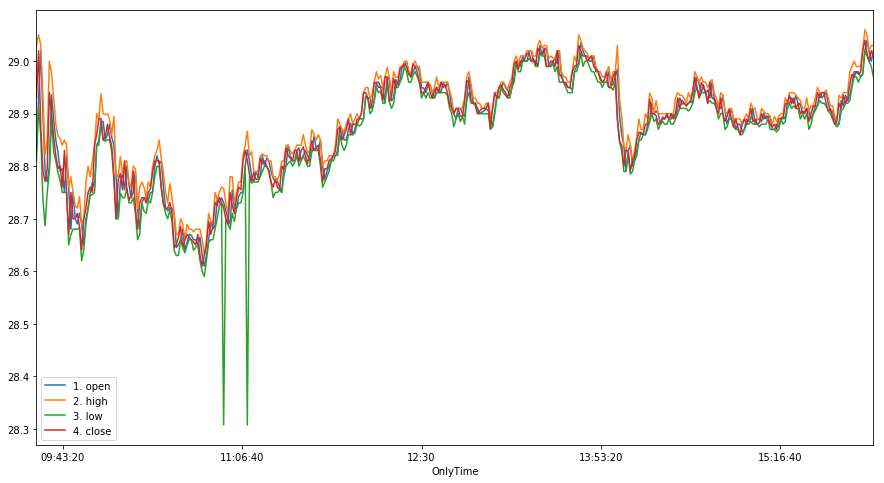

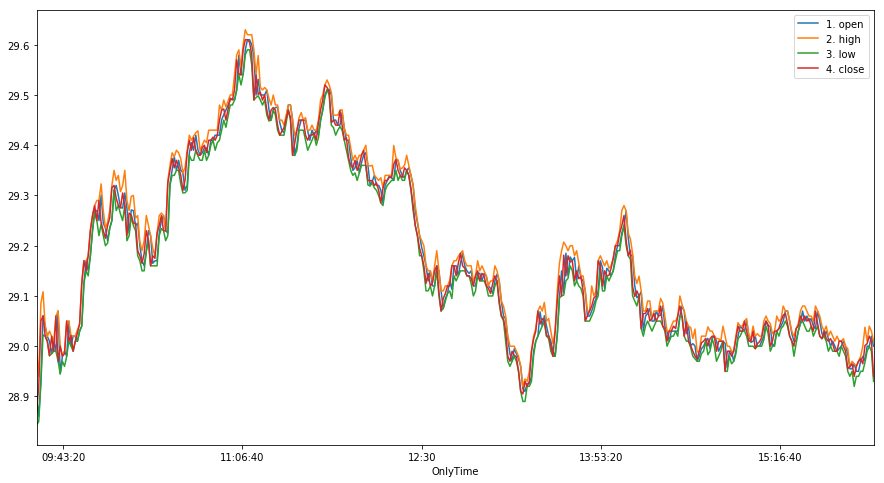

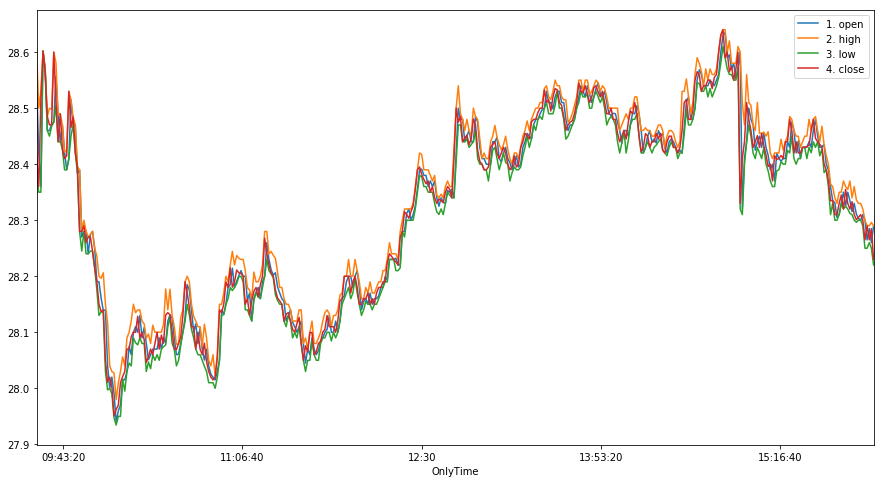

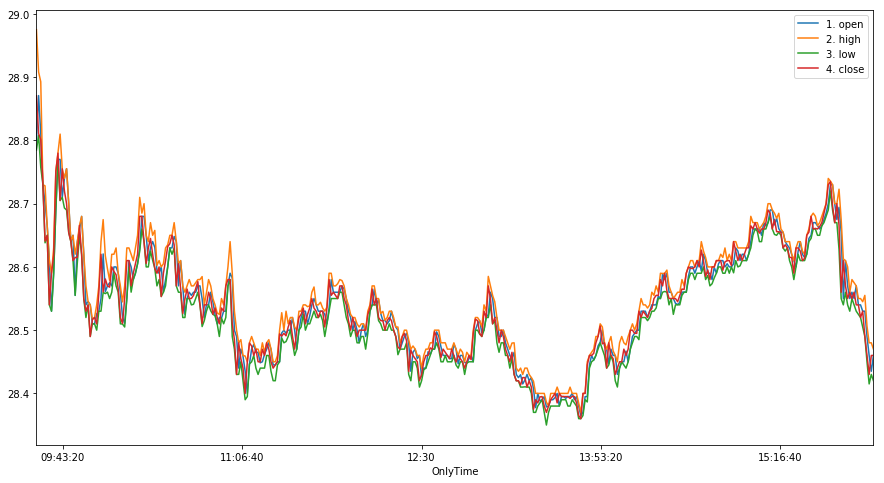

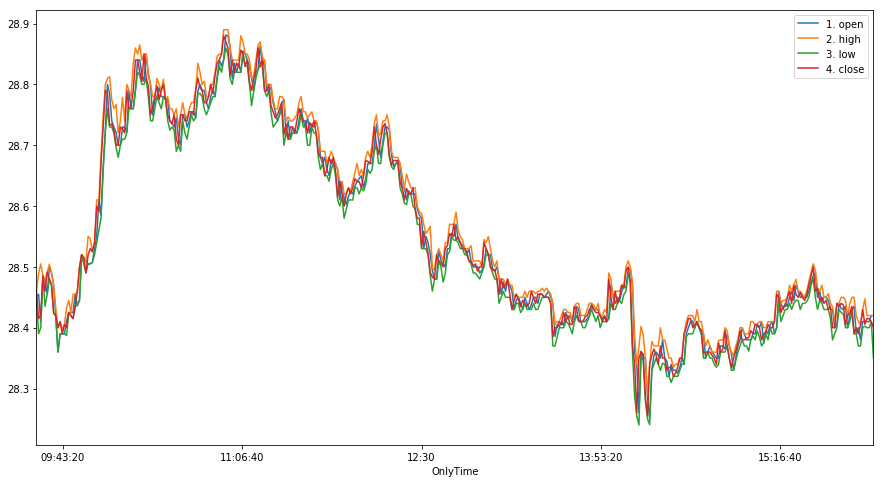

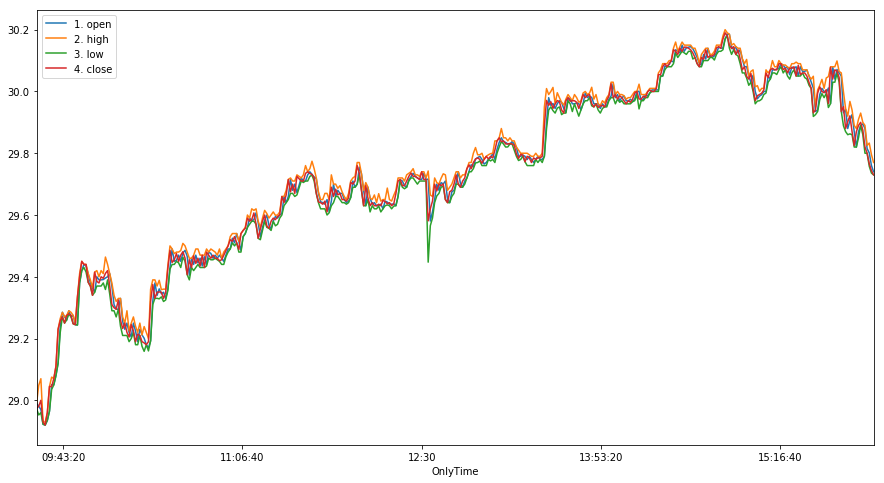

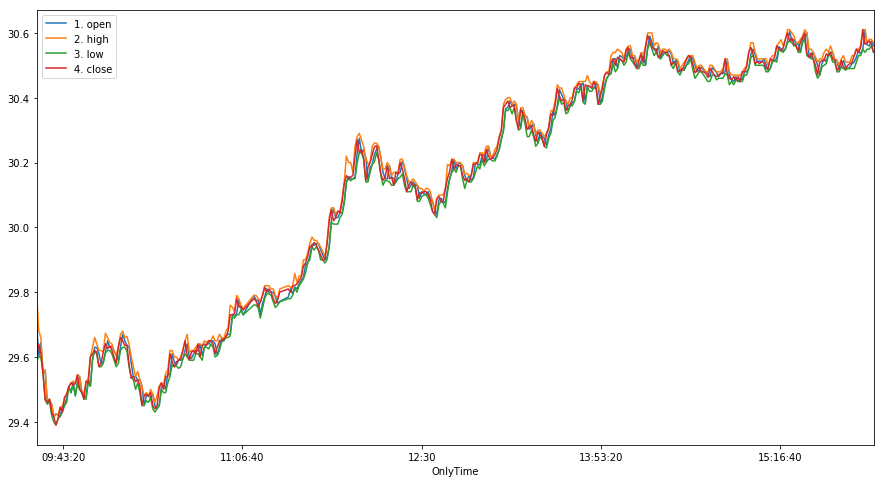

In [15]:
google.set_index(google['OnlyTime']).groupby("OnlyDate")[["1. open", "2. high",	"3. low",	"4. close"]].plot(figsize=(15,8))

### Apple

OnlyDate
2019-10-04    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-07    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-08    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-09    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-10    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-11    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-14    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

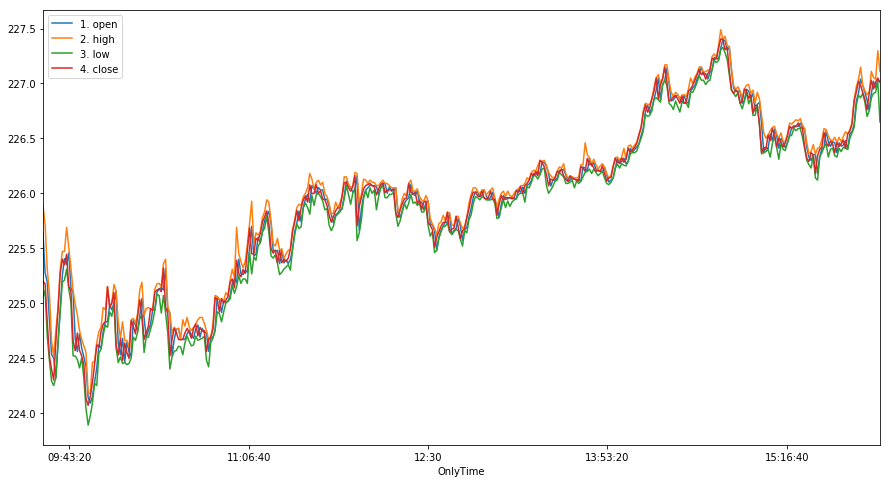

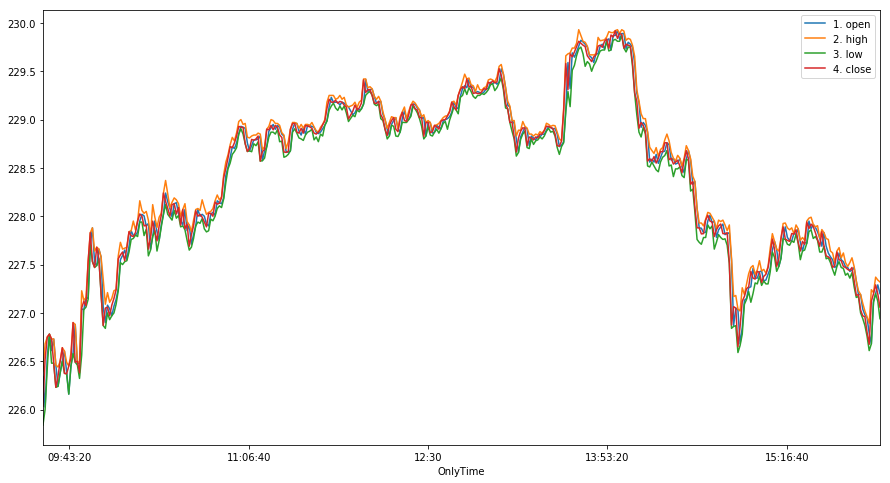

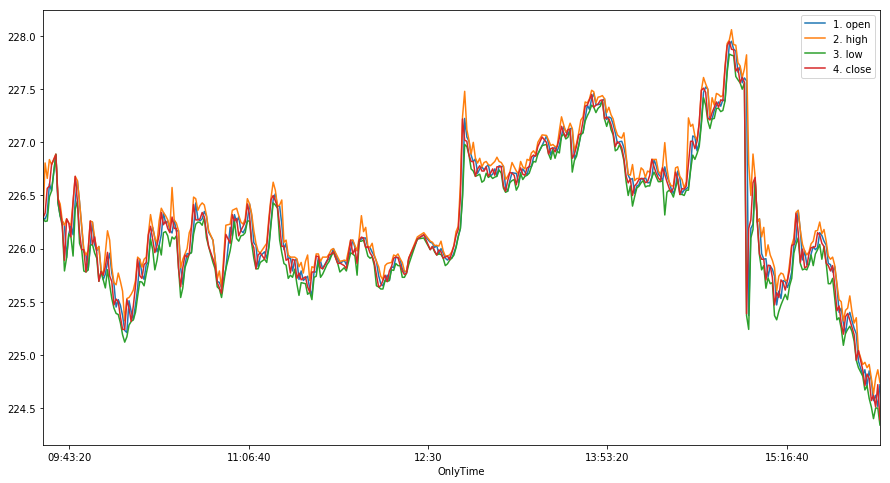

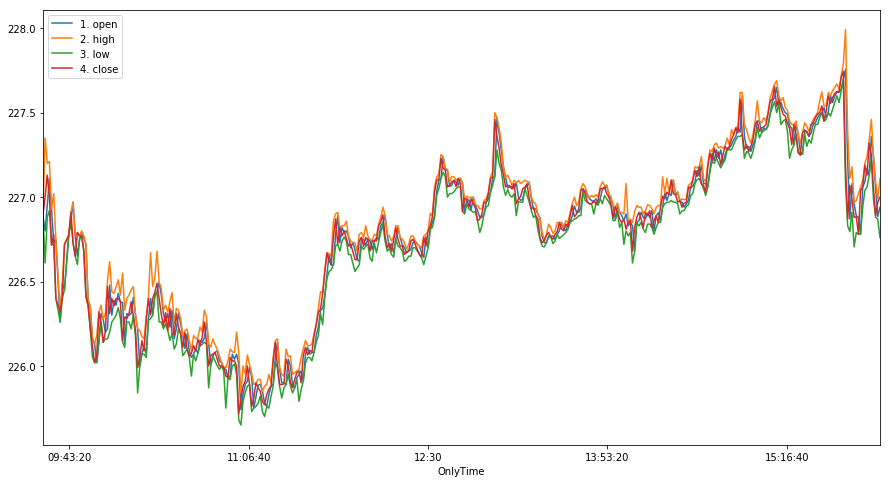

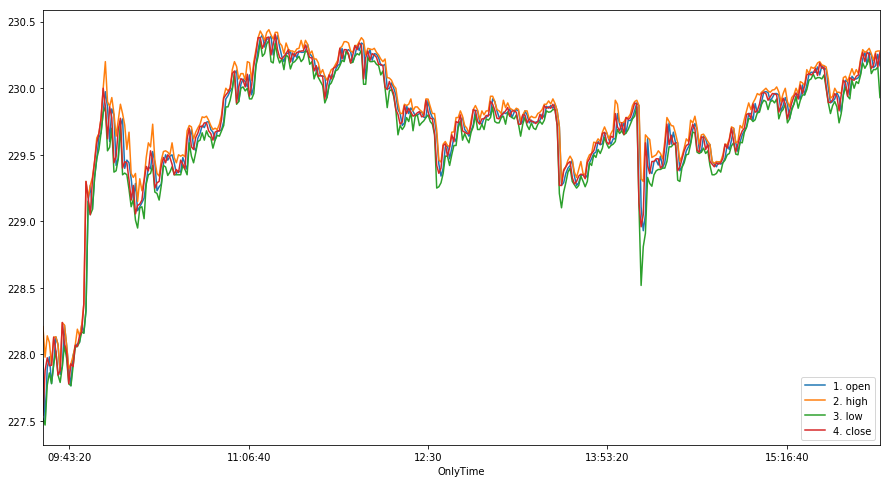

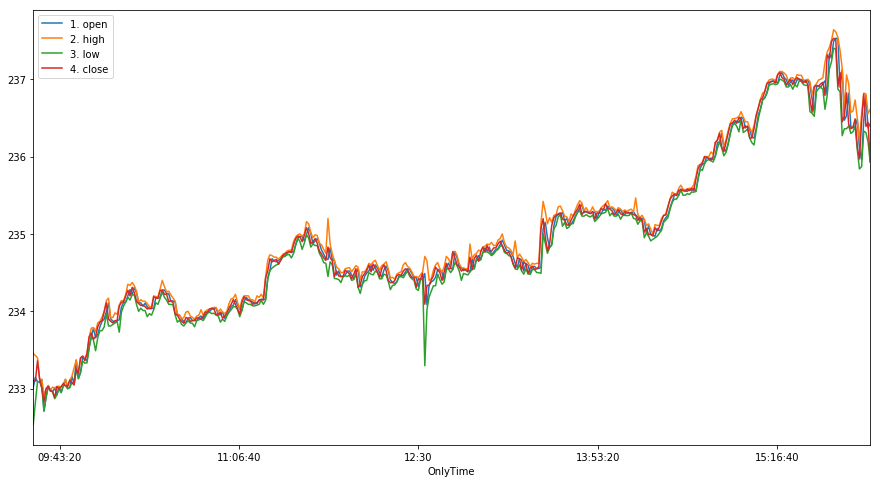

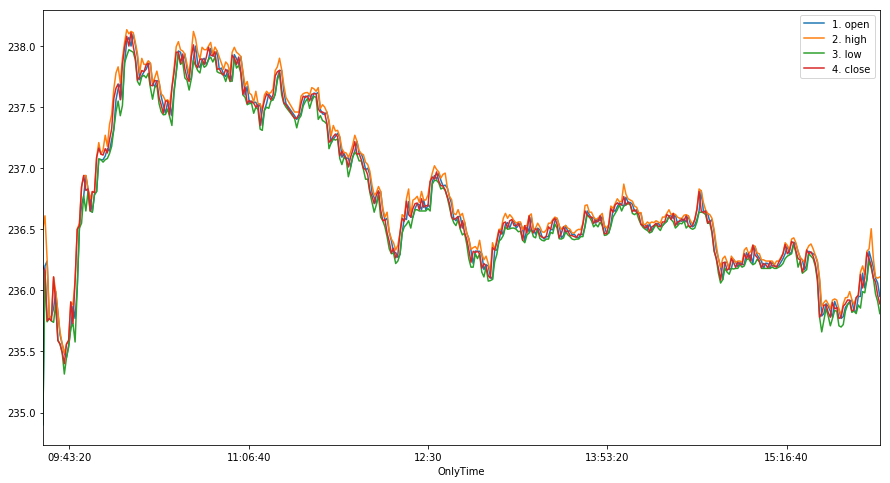

In [16]:
apple.set_index(apple['OnlyTime']).groupby("OnlyDate")[["1. open", "2. high",	"3. low",	"4. close"]].plot(figsize=(15,8))

### Tesla

OnlyDate
2019-10-04    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-07    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-08    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-09    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-10    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-11    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-14    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

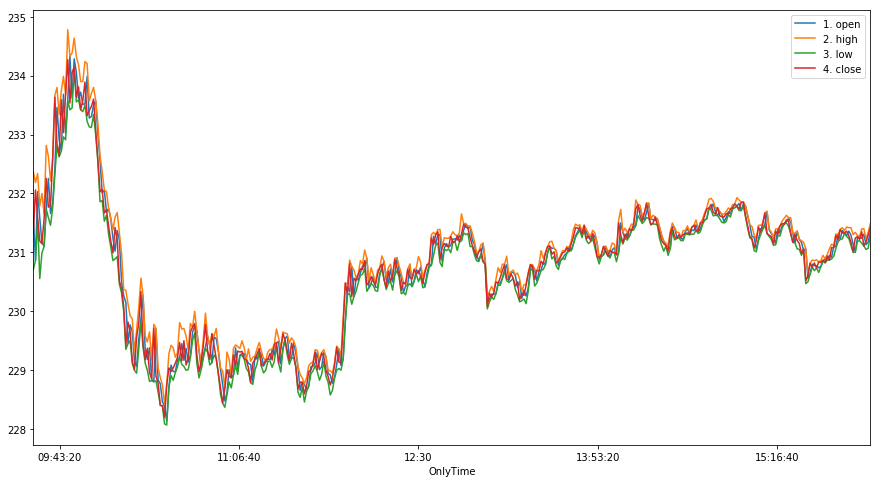

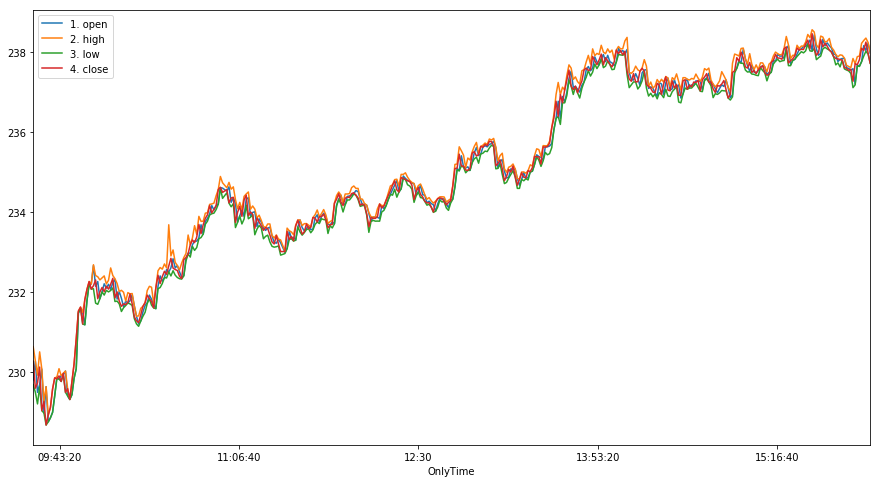

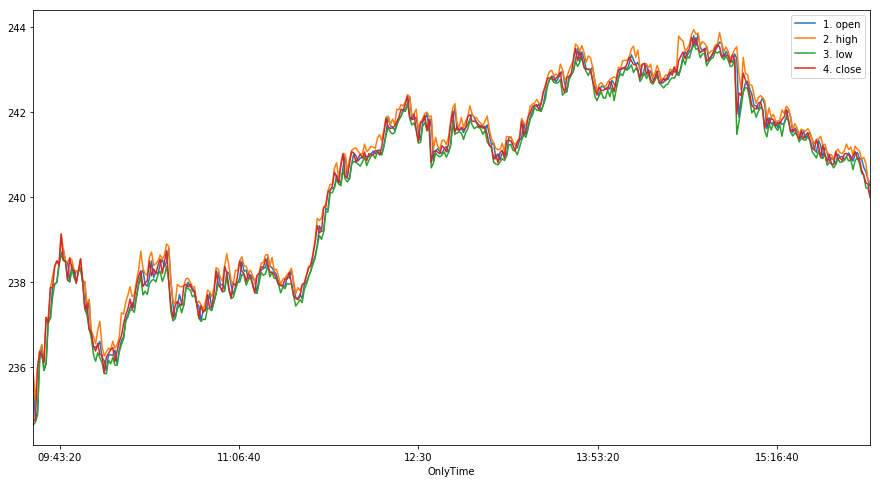

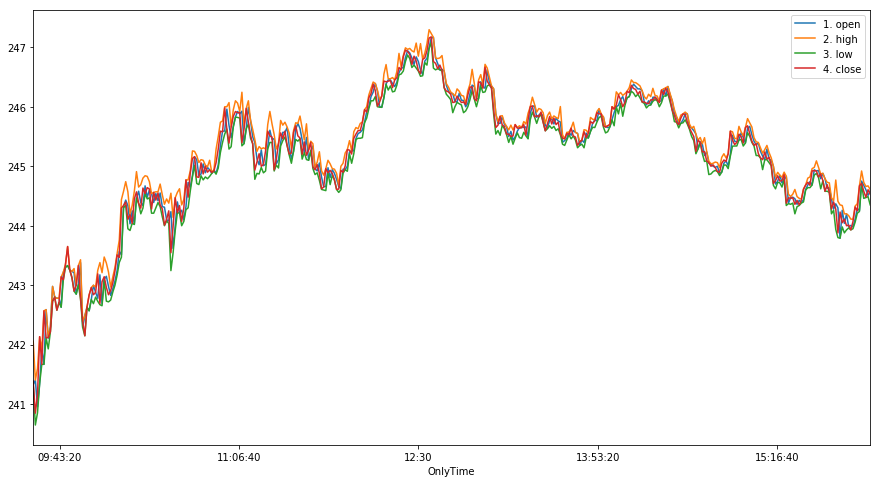

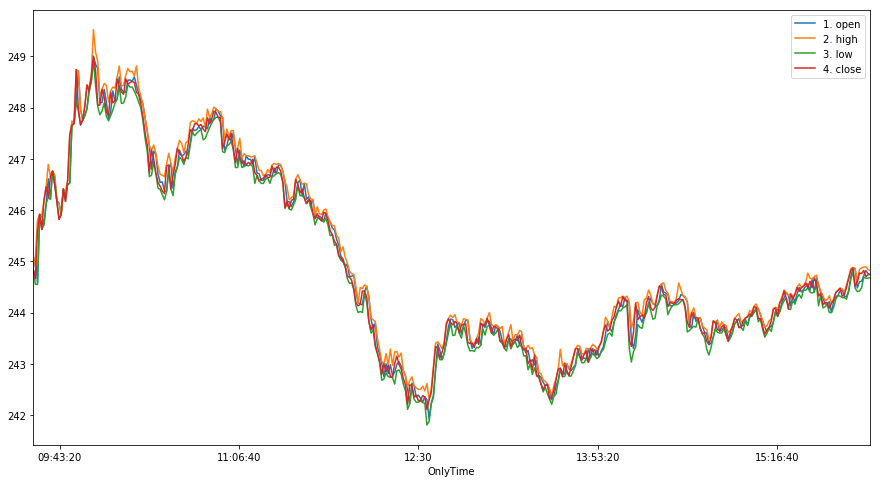

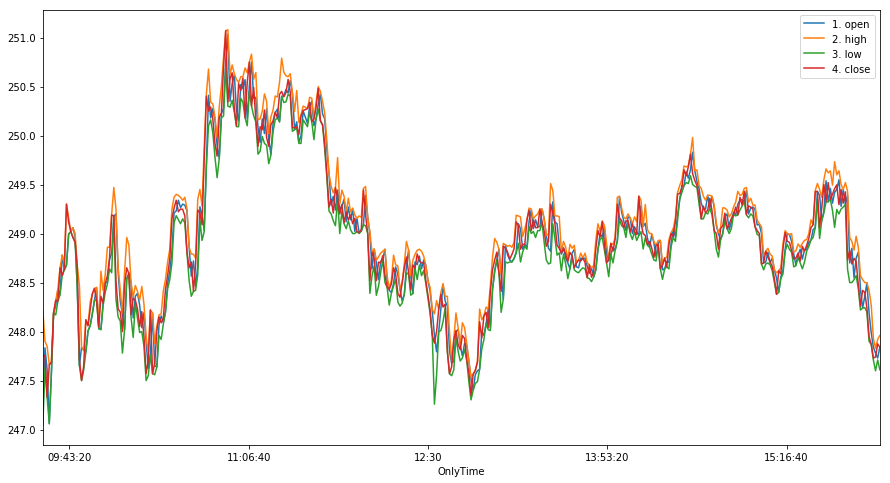

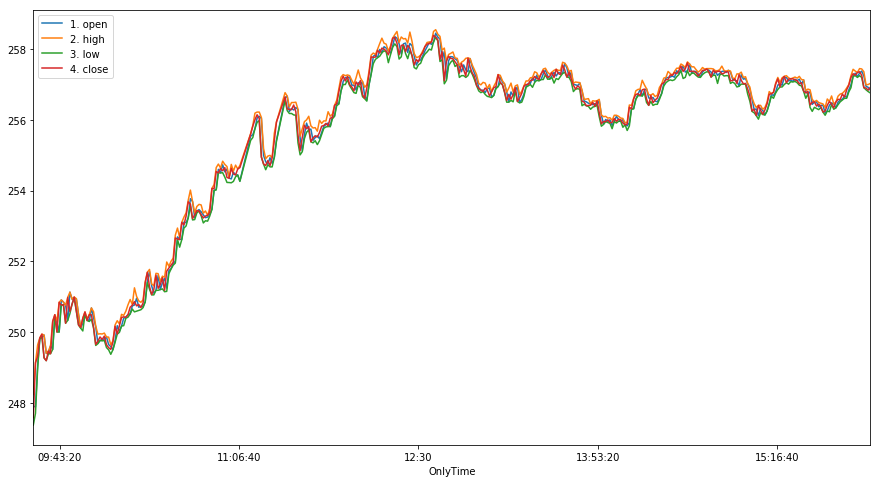

In [17]:
tesla.set_index(tesla['OnlyTime']).groupby("OnlyDate")[["1. open", "2. high",	"3. low",	"4. close"]].plot(figsize=(15,8))

### Intel

OnlyDate
2019-10-04    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-07    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-08    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-09    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-10    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-11    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-14    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

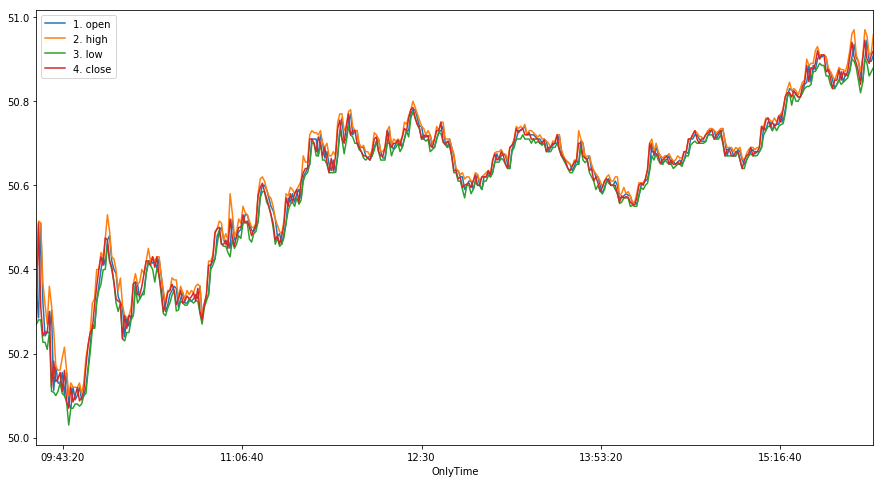

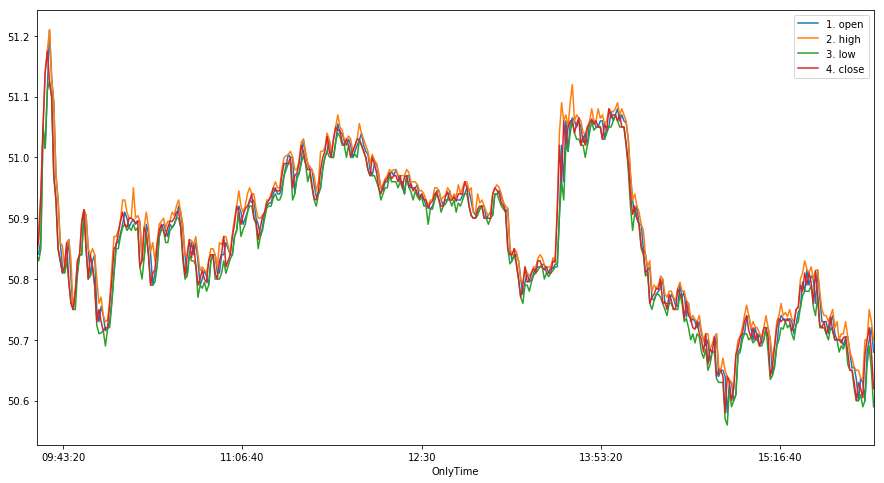

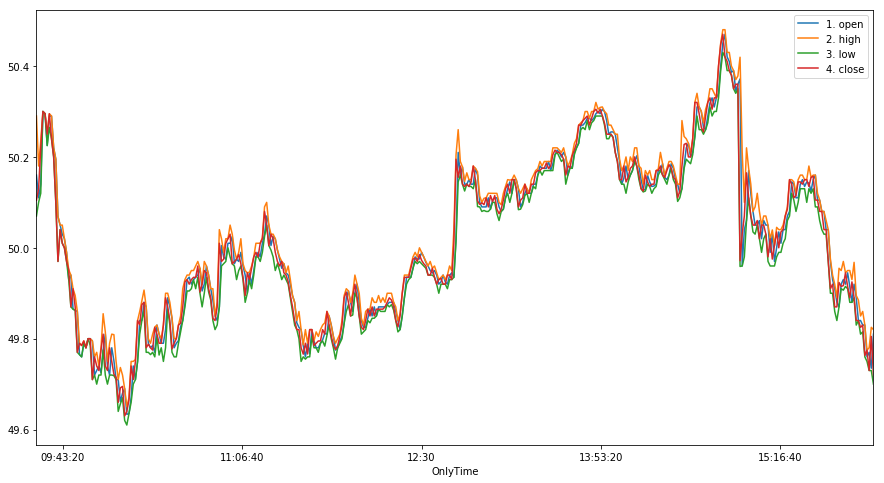

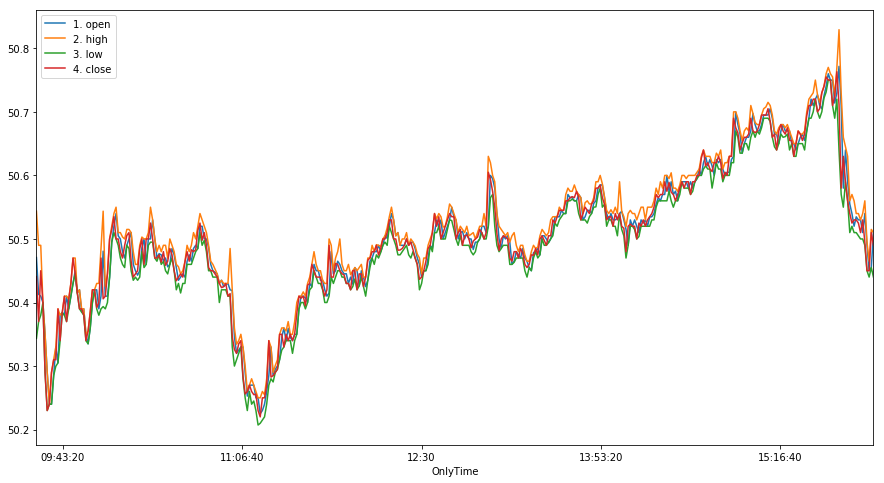

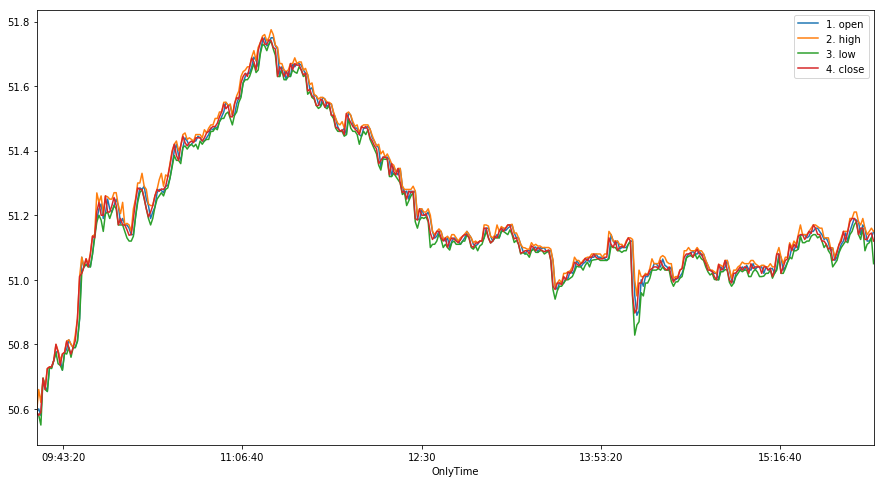

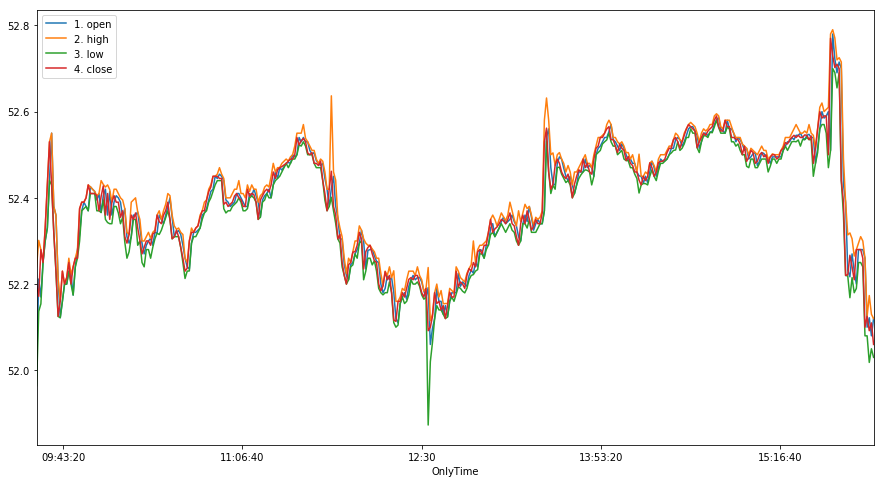

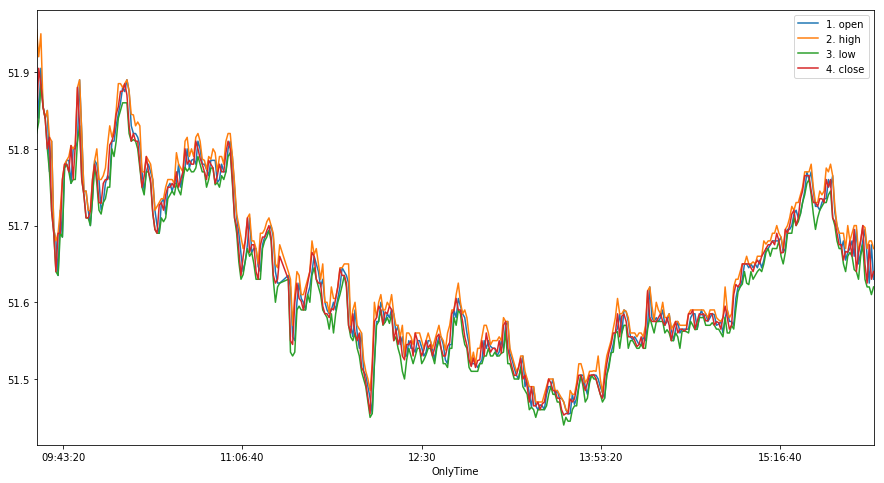

In [18]:
intel.set_index(intel['OnlyTime']).groupby("OnlyDate")[["1. open", "2. high",	"3. low",	"4. close"]].plot(figsize=(15,8))

### AMD

OnlyDate
2019-10-04    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-07    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-08    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-09    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-10    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-11    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-14    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

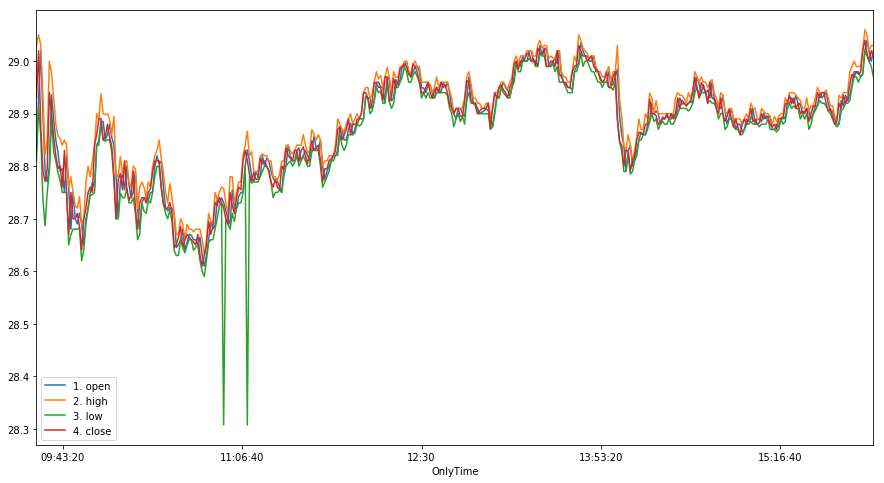

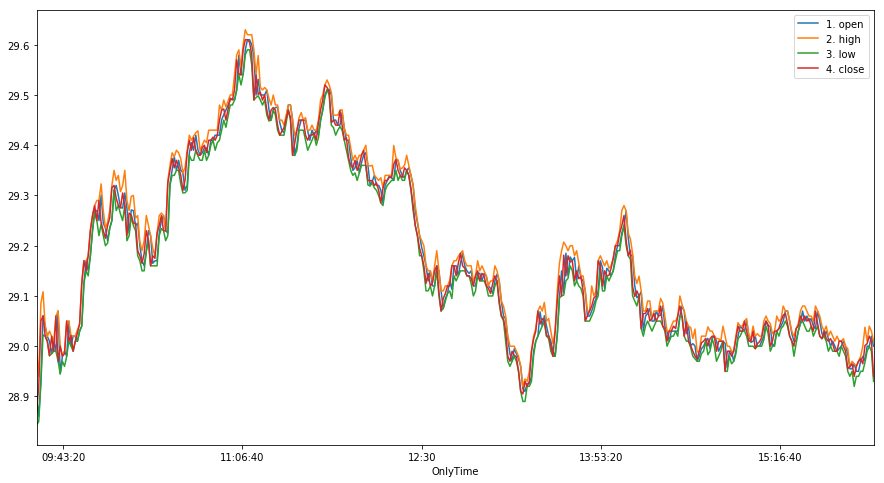

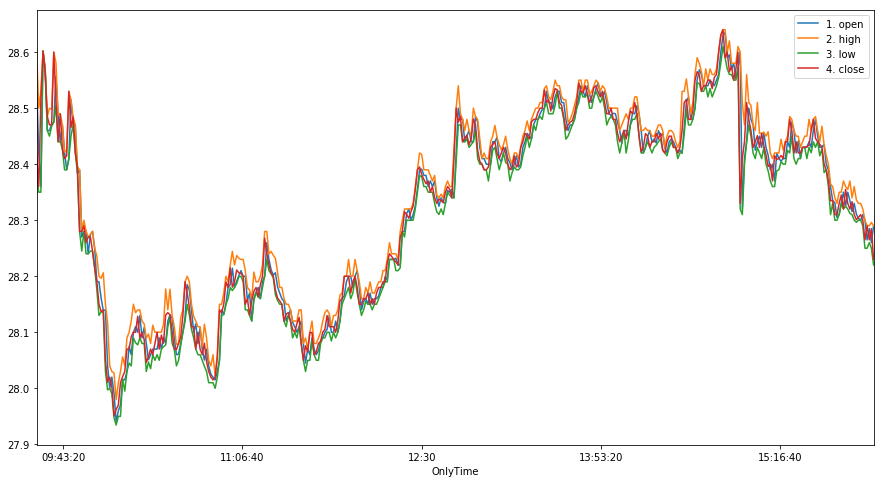

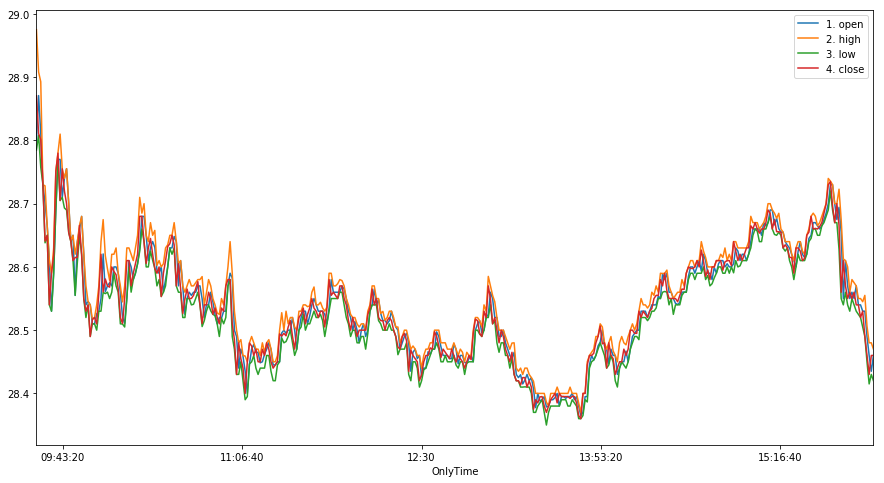

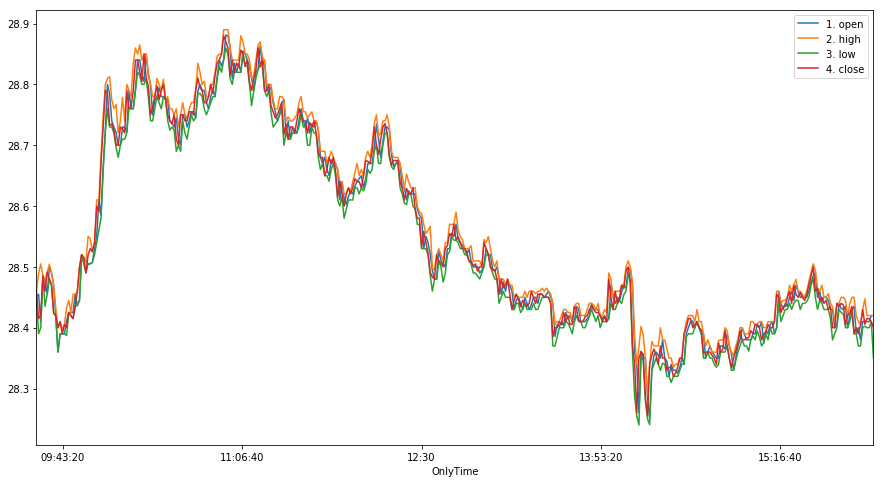

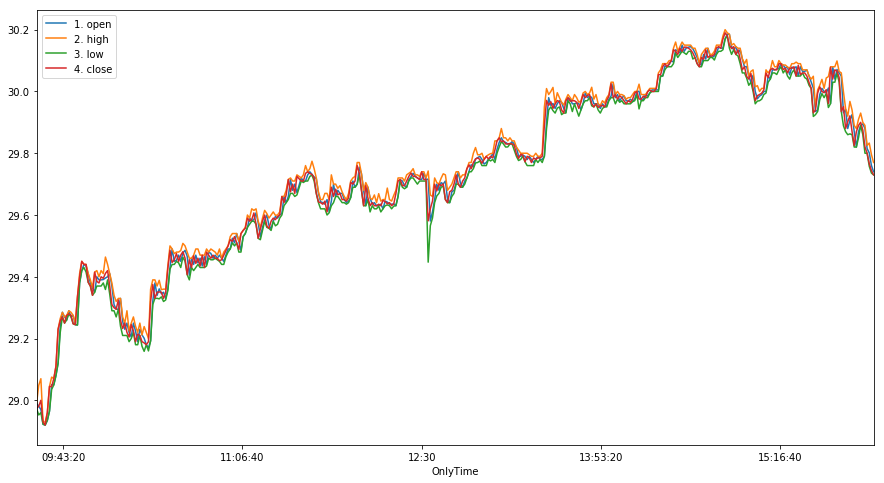

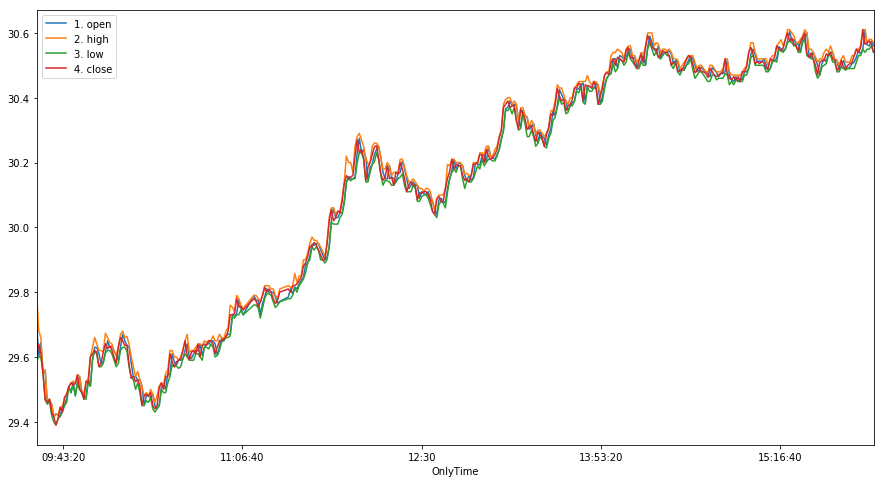

In [19]:
amd.set_index(amd['OnlyTime']).groupby("OnlyDate")[["1. open", "2. high",	"3. low",	"4. close"]].plot(figsize=(15,8))

### About the statistics
- The most important features were analysed with some statistical methods
- Some remarks about the statistics:
  - available data for different days were changed - not every data point was provided
  - the data points available all had proper values for each symbol

In [20]:
AllData.head(5)

date  1. open  2. high  ...     sym    OnlyDate  OnlyTime
0 2019-10-04 09:31:00  28.8300  29.0300  ...  Google  2019-10-04  09:31:00
1 2019-10-04 09:32:00  28.9300  29.0500  ...  Google  2019-10-04  09:32:00
2 2019-10-04 09:33:00  29.0200  29.0300  ...  Google  2019-10-04  09:33:00
3 2019-10-04 09:34:00  28.9011  28.9341  ...  Google  2019-10-04  09:34:00
4 2019-10-04 09:35:00  28.7910  28.8218  ...  Google  2019-10-04  09:35:00

[5 rows x 9 columns]

In [21]:
AllData.groupby(["sym", "OnlyDate"])[["OnlyDate", "1. open", "2. high",	"3. low",	"4. close"]].describe().T

sym                    AMD              ...       Tesla            
OnlyDate        2019-10-04  2019-10-07  ...  2019-10-11  2019-10-14
1. open  count  390.000000  388.000000  ...  389.000000  383.000000
         mean    28.872391   29.180186  ...  248.950573  255.510369
         std      0.097131    0.176953  ...    0.725287    2.590256
         min     28.609900   28.860000  ...  247.060000  247.880000
         25%     28.806175   29.025000  ...  248.530000  254.670000
         50%     28.890150   29.140000  ...  248.885500  256.620000
         75%     28.945000   29.336250  ...  249.280000  257.214550
         max     29.040000   29.610000  ...  251.030000  258.450000
2. high  count  390.000000  388.000000  ...  389.000000  383.000000
         mean    28.892242   29.200543  ...  249.097427  255.671281
         std      0.092718    0.177028  ...    0.726376    2.559864
         min     28.630000   28.920000  ...  247.535000  248.240300
         25%     28.829100   29.044775  ...  248.670000  254.790000
         50%     28.910000   29.160000  ...  249.000000  256.790000
         75%     28.960000   29.356250  ...  249.420000  257.350000
         max     29.060000   29.630000  ...  251.080000  258.550000
3. low   count  390.000000  388.000000  ...  389.000000  383.000000
         mean    28.853904   29.162376  ...  248.820501  255.376384
         std      0.107565    0.175976  ...    0.719813    2.595693
         min     28.307100   28.843100  ...  247.046400  247.369500
         25%     28.788425   29.012250  ...  248.400000  254.502200
         50%     28.880000   29.120000  ...  248.790000  256.500000
         75%     28.930000   29.321525  ...  249.150000  257.100000
         max     29.020000   29.590000  ...  250.700000  258.340800
4. close count  390.000000  388.000000  ...  389.000000  383.000000
         mean    28.872620   29.179932  ...  248.953744  255.519966
         std      0.097481    0.176118  ...    0.721009    2.574543
         min     28.610000   28.868400  ...  247.327300  247.576500
         25%     28.809525   29.030000  ...  248.540000  254.650000
         50%     28.894400   29.140000  ...  248.890000  256.621900
         75%     28.945250   29.335825  ...  249.270100  257.228300
         max     29.040000   29.610000  ...  251.070000  258.390500

[32 rows x 35 columns]

In [22]:
google.groupby("OnlyDate")[["OnlyDate", "1. open", "2. high",	"3. low",	"4. close"]].describe().T

OnlyDate        2019-10-04  2019-10-07  ...  2019-10-11  2019-10-14
1. open  count  390.000000  388.000000  ...  389.000000  383.000000
         mean    28.872391   29.180186  ...   29.732607   30.125938
         std      0.097131    0.176953  ...    0.289741    0.381715
         min     28.609900   28.860000  ...   28.920000   29.415000
         25%     28.806175   29.025000  ...   29.540000   29.742450
         50%     28.890150   29.140000  ...   29.733300   30.210000
         75%     28.945000   29.336250  ...   29.980000   30.490000
         max     29.040000   29.610000  ...   30.185700   30.610000
2. high  count  390.000000  388.000000  ...  389.000000  383.000000
         mean    28.892242   29.200543  ...   29.755147   30.145454
         std      0.092718    0.177028  ...    0.285797    0.380768
         min     28.630000   28.920000  ...   28.930000   29.415000
         25%     28.829100   29.044775  ...   29.560000   29.780000
         50%     28.910000   29.160000  ...   29.750000   30.220000
         75%     28.960000   29.356250  ...   30.000000   30.509300
         max     29.060000   29.630000  ...   30.200000   30.610000
3. low   count  390.000000  388.000000  ...  389.000000  383.000000
         mean    28.853904   29.162376  ...   29.714981   30.110195
         std      0.107565    0.175976  ...    0.290044    0.382468
         min     28.307100   28.843100  ...   28.920000   29.390000
         25%     28.788425   29.012250  ...   29.520000   29.730050
         50%     28.880000   29.120000  ...   29.720000   30.190000
         75%     28.930000   29.321525  ...   29.968800   30.477500
         max     29.020000   29.590000  ...   30.180000   30.580000
4. close count  390.000000  388.000000  ...  389.000000  383.000000
         mean    28.872620   29.179932  ...   29.734246   30.128264
         std      0.097481    0.176118  ...    0.287343    0.381802
         min     28.610000   28.868400  ...   28.920000   29.390000
         25%     28.809525   29.030000  ...   29.550000   29.755000
         50%     28.894400   29.140000  ...   29.734900   30.210000
         75%     28.945250   29.335825  ...   29.980000   30.490000
         max     29.040000   29.610000  ...   30.189900   30.610000

[32 rows x 7 columns]

## Missing Data

Stock exchanges are open from 9:30 to 16:00
- 390 minutes (data points) are the ideal that the API should provide.
- Data points were counted for different days and it was divided with the ideal number (390). It provided a percentage ratio: how many data points were provided by the API.


First it we checked the distribution of the missing data and summarized it in a table

In [23]:
(AllData.groupby(["sym","OnlyDate"])[["1. open", "2. high",	"3. low",	"4. close"]].count()/390*100)

1. open     2. high      3. low    4. close
sym    OnlyDate                                                  
AMD    2019-10-04  100.000000  100.000000  100.000000  100.000000
       2019-10-07   99.487179   99.487179   99.487179   99.487179
       2019-10-08  100.000000  100.000000  100.000000  100.000000
       2019-10-09  100.000000  100.000000  100.000000  100.000000
       2019-10-10  100.000000  100.000000  100.000000  100.000000
       2019-10-11   99.743590   99.743590   99.743590   99.743590
       2019-10-14   98.205128   98.205128   98.205128   98.205128
Apple  2019-10-04  100.000000  100.000000  100.000000  100.000000
       2019-10-07   99.743590   99.743590   99.743590   99.743590
       2019-10-08   95.128205   95.128205   95.128205   95.128205
       2019-10-09   99.487179   99.487179   99.487179   99.487179
       2019-10-10  100.000000  100.000000  100.000000  100.000000
       2019-10-11   99.743590   99.743590   99.743590   99.743590
       2019-10-14   99.230769   99.230769   99.230769   99.230769
Google 2019-10-04  100.000000  100.000000  100.000000  100.000000
       2019-10-07   99.487179   99.487179   99.487179   99.487179
       2019-10-08  100.000000  100.000000  100.000000  100.000000
       2019-10-09  100.000000  100.000000  100.000000  100.000000
       2019-10-10  100.000000  100.000000  100.000000  100.000000
       2019-10-11   99.743590   99.743590   99.743590   99.743590
       2019-10-14   98.205128   98.205128   98.205128   98.205128
Intel  2019-10-04  100.000000  100.000000  100.000000  100.000000
       2019-10-07   99.487179   99.487179   99.487179   99.487179
       2019-10-08  100.000000  100.000000  100.000000  100.000000
       2019-10-09   99.743590   99.743590   99.743590   99.743590
       2019-10-10  100.000000  100.000000  100.000000  100.000000
       2019-10-11   99.743590   99.743590   99.743590   99.743590
       2019-10-14   99.230769   99.230769   99.230769   99.230769
Tesla  2019-10-04  100.000000  100.000000  100.000000  100.000000
       2019-10-07   99.487179   99.487179   99.487179   99.487179
       2019-10-08  100.000000  100.000000  100.000000  100.000000
       2019-10-09  100.000000  100.000000  100.000000  100.000000
       2019-10-10   99.743590   99.743590   99.743590   99.743590
       2019-10-11   99.743590   99.743590   99.743590   99.743590
       2019-10-14   98.205128   98.205128   98.205128   98.205128

The table above is visualized with a plot.

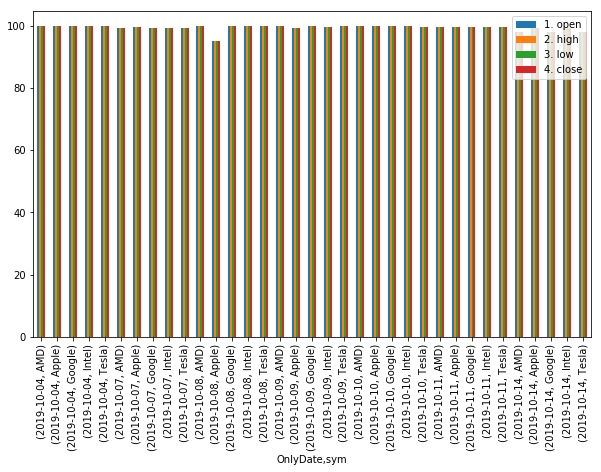

In [24]:
(AllData.groupby(["OnlyDate","sym"])[["1. open", "2. high",	"3. low",	"4. close"]].count()/390*100).plot(kind='bar', figsize=(10,6))

The following table shows how many data points are missing for each symbol

In [25]:
((AllData.groupby(["sym","OnlyDate"])[["1. open", "2. high",	"3. low",	"4. close"]].count()-390)*-1)

1. open  2. high  3. low  4. close
sym    OnlyDate                                      
AMD    2019-10-04        0        0       0         0
       2019-10-07        2        2       2         2
       2019-10-08        0        0       0         0
       2019-10-09        0        0       0         0
       2019-10-10        0        0       0         0
       2019-10-11        1        1       1         1
       2019-10-14        7        7       7         7
Apple  2019-10-04        0        0       0         0
       2019-10-07        1        1       1         1
       2019-10-08       19       19      19        19
       2019-10-09        2        2       2         2
       2019-10-10        0        0       0         0
       2019-10-11        1        1       1         1
       2019-10-14        3        3       3         3
Google 2019-10-04        0        0       0         0
       2019-10-07        2        2       2         2
       2019-10-08        0        0       0         0
       2019-10-09        0        0       0         0
       2019-10-10        0        0       0         0
       2019-10-11        1        1       1         1
       2019-10-14        7        7       7         7
Intel  2019-10-04        0        0       0         0
       2019-10-07        2        2       2         2
       2019-10-08        0        0       0         0
       2019-10-09        1        1       1         1
       2019-10-10        0        0       0         0
       2019-10-11        1        1       1         1
       2019-10-14        3        3       3         3
Tesla  2019-10-04        0        0       0         0
       2019-10-07        2        2       2         2
       2019-10-08        0        0       0         0
       2019-10-09        0        0       0         0
       2019-10-10        1        1       1         1
       2019-10-11        1        1       1         1
       2019-10-14        7        7       7         7

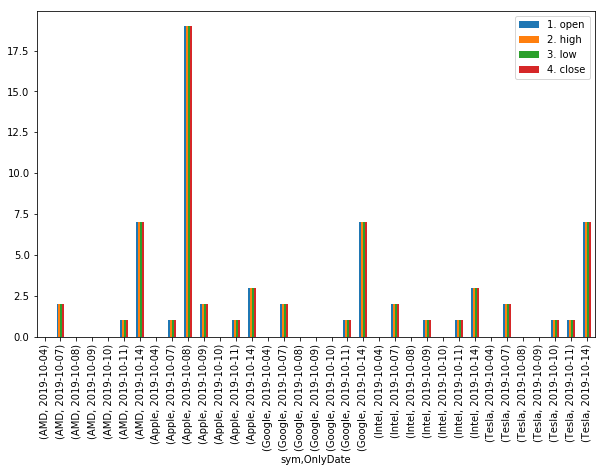

In [26]:
((AllData.groupby(["sym","OnlyDate"])[["1. open", "2. high",	"3. low",	"4. close"]].count()-390)*-1).plot(kind="bar", figsize=(10,6))

This exploratory study helped us decide which data we should use from this API (Google data was inadequate).

# Transform the data to become suitable for neural networks

This train test split would be the same for the different stocks. It seems we should use different neural networks for the different securities. The train and test datasets are scaled.

In [0]:
test_split = 0.1
valid_split = 0.1

data_cols = ['1. open','2. high', '3. low', '4. close', '5. volume']

scaler = MinMaxScaler()

In [28]:
amd_train, amd_test = train_test_split(amd, train_size = 0.8, test_size = 0.2, shuffle = False)

amd_x = amd_train.loc[:, data_cols].values



amd_x_train = scaler.fit_transform(amd_x)
amd_x_test = scaler.transform(amd_test.loc[:, data_cols].values)



amd_x_train, amd_y_train = get_timeseries(amd_x_train, 60)
amd_x_train = trim_dataset(amd_x_train, 32)
amd_y_train = trim_dataset(amd_y_train, 32)

amd_x_val_test, amd_y_val_test = get_timeseries(amd_x_test, 60)
amd_x_val, amd_x_test = np.split(trim_dataset(amd_x_val_test, 32),2)
amd_y_val, amd_y_test = np.split(trim_dataset(amd_y_val_test, 32),2)

amd_x_train 

array([[[0.46596859, 0.55263158, 0.46001471, 0.51566697, 0.61548057],
        [0.51832461, 0.56315789, 0.51376629, 0.56301016, 0.23657756],
        [0.56544503, 0.55263158, 0.48628625, 0.48691348, 0.17142177],
        ...,
        [0.45287958, 0.45789474, 0.4547604 , 0.45241982, 0.07285039],
        [0.45549738, 0.43947368, 0.43374317, 0.42608879, 0.05044892],
        [0.42973822, 0.42521053, 0.4168243 , 0.40934225, 0.07530404]],

       [[0.51832461, 0.56315789, 0.51376629, 0.56301016, 0.23657756],
        [0.56544503, 0.55263158, 0.48628625, 0.48691348, 0.17142177],
        [0.50319372, 0.50215789, 0.42160572, 0.44246669, 0.22451235],
        ...,
        [0.45549738, 0.43947368, 0.43374317, 0.42608879, 0.05044892],
        [0.42973822, 0.42521053, 0.4168243 , 0.40934225, 0.07530404],
        [0.40837696, 0.40526316, 0.40747163, 0.40502396, 0.04481187]],

       [[0.56544503, 0.55263158, 0.48628625, 0.48691348, 0.17142177],
        [0.50319372, 0.50215789, 0.42160572, 0.44246669, 0.2